In [1]:
#import Requuired Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
#Load The Dataset
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# View data Informatio 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# look at numeric and categorical values separately 
titanic_num = titanic[['Age','SibSp','Parch','Fare']]
titanic_cat = titanic[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

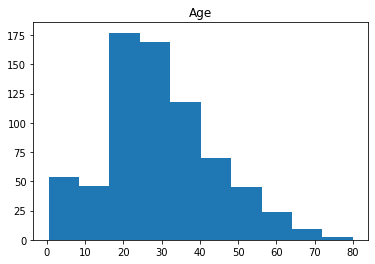

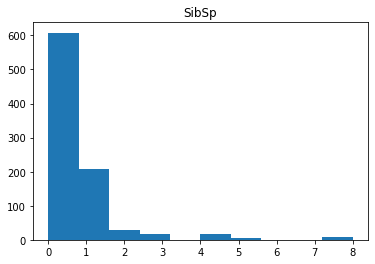

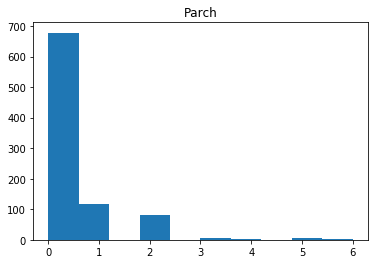

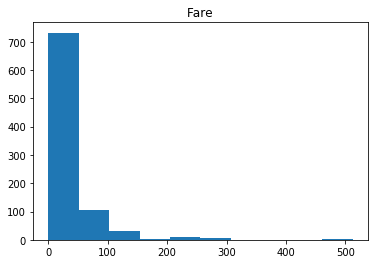

In [7]:
#distributions for all numeric variables 
for i in titanic_num.columns:
    plt.hist(titanic_num[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


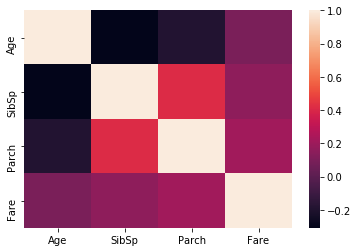

In [8]:
print(titanic_num.corr())
sns.heatmap(titanic_num.corr())

In [9]:
# compare survival rate across Age, SibSp, Parch, and Fare 
pd.pivot_table(titanic, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


C:\Users\Ankita Jauhar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


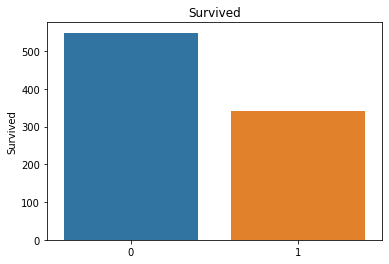

C:\Users\Ankita Jauhar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


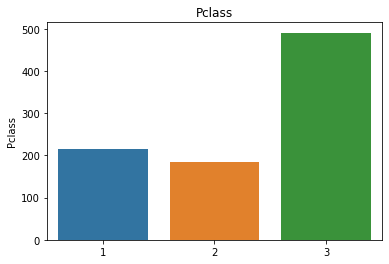

C:\Users\Ankita Jauhar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


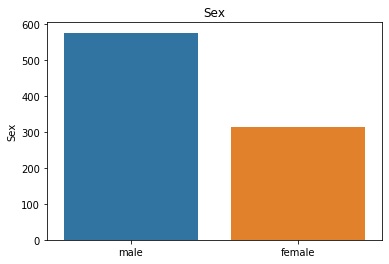

C:\Users\Ankita Jauhar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


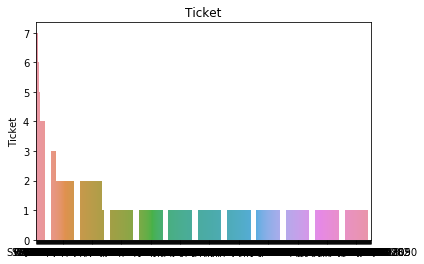

C:\Users\Ankita Jauhar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


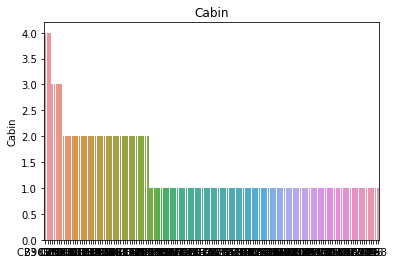

C:\Users\Ankita Jauhar\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


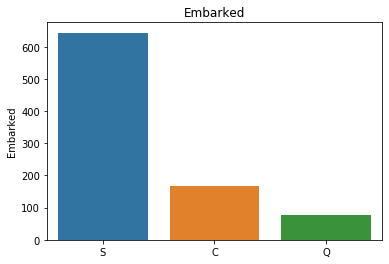

In [10]:
for i in titanic_cat.columns:
    sns.barplot(titanic_cat[i].value_counts().index,titanic_cat[i].value_counts()).set_title(i)
    plt.show()

In [11]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(titanic, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


Feature Engineering

1) Cabin - Simplify cabins (evaluated if cabin letter (cabin_adv) or the purchase of tickets across multiple cabins (cabin_multiple) impacted survival)

2) Tickets - Do different ticket types impact survival rates?

3) Does a person's title relate to survival rates?


In [12]:
titanic_cat.Cabin
titanic['cabin_multiple'] = titanic.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
# after looking at this, we may want to look at cabin by letter or by number. Let's create some categories for this 
# letters 
# multiple letters 
titanic['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [13]:
pd.pivot_table(titanic, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket' ,aggfunc ='count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [14]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

titanic['cabin_adv'] = titanic.Cabin.apply(lambda x: str(x)[0])

In [15]:
#comparing surivial rate by cabin
print(titanic.cabin_adv.value_counts())
pd.pivot_table(titanic,index='Survived',columns='cabin_adv', values = 'Name', aggfunc='count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_adv, dtype: int64


cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [16]:
#understand ticket values better 
#numeric vs non numeric 
titanic['numeric_ticket'] = titanic.Ticket.apply(lambda x: 1 if x.isnumeric() else 0)
titanic['ticket_letters'] = titanic.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)
titanic['numeric_ticket'].value_counts()


1    661
0    230
Name: numeric_ticket, dtype: int64

In [17]:
#difference in numeric vs non-numeric tickets in survival rate 
pd.pivot_table(titanic,index='Survived',columns='numeric_ticket', values = 'Ticket', aggfunc='count')

numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


In [18]:
#survival rate across different tyicket types 
pd.pivot_table(titanic,index='Survived',columns='ticket_letters', values = 'Ticket', aggfunc='count')

ticket_letters,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [19]:
#feature engineering on person's title 
titanic.Name.head(100)
titanic['name_title'] = titanic.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [20]:
titanic['name_title'].value_counts()


Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
the Countess      1
Ms                1
Capt              1
Don               1
Mme               1
Sir               1
Lady              1
Jonkheer          1
Name: name_title, dtype: int64

Data Preprocessing for Model

1) Drop null values from Embarked (only 2)

2) Include only relevant variables (Since we have limited data, I wanted to exclude things like name and passanger ID so that we could have a reasonable number of features for our models to deal with)
Variables: 'Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'cabin_adv', 'cabin_multiple', 'numeric_ticket', 'name_title'

    
3) Do categorical transforms on all data. Usually we would use a transformer, but with this approach we can ensure that our traning and test data have the same colums. We also may be able to infer something about the shape of the test data through this method. I will stress, this is generally not recommend outside of a competition (use onehot encoder).

4) Impute data with mean for age and Embarked

5) Scaled data 0-1 with standard scaler

In [21]:
# Check for Missing Values

titanic.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
cabin_multiple      0
cabin_adv           0
numeric_ticket      0
ticket_letters      0
name_title          0
dtype: int64

In [22]:
titanic = titanic.drop(columns = ['PassengerId','Name','Cabin','Ticket'])

In [23]:
titanic['Age'].fillna(int(titanic['Age'].mean()), inplace=True)

In [24]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [25]:
# converted fare to category for pd.get_dummies()
titanic.Pclass = titanic.Pclass.astype(str)

In [26]:
#created dummy variables from categories (also can use OneHotEncoder)
all_dummies = pd.get_dummies(titanic[['Pclass','Sex','Age','SibSp','Parch','Embarked','cabin_adv','cabin_multiple','numeric_ticket','name_title']])

In [27]:
all_dummies['Survived']=titanic['Survived']

In [28]:
#Seperate  the dataset as target variable and feature variable
x= all_dummies.drop("Survived",axis=1)
y= all_dummies["Survived"]

In [29]:
x.shape

(891, 39)

In [30]:
# Split in Train Test data

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size= 0.2, random_state = 25)

In [31]:
#Applyig Standard Scaler to scale values

sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Model Building

Naive Bayes (58.5%)

Logistic Regression (81.6%)

Decision Tree (80.2%)

K Nearest Neighbor (79.2%)

Random Forest (81.7%)

Support Vector Classifier (81.3%)

SGD Classifier (75.1%)

In [52]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
pred_gnb = gnb.predict(x_test)
cv = cross_val_score(gnb,x_train,y_train,cv=5)
print(cv)
print("Cross Validation Score", cv.mean())
print("check Naive Bayes Performance")
print(classification_report(y_test, pred_gnb))
print("Confusion Matrix for Naive Bayes")
print(confusion_matrix(y_test,pred_gnb))

[0.68531469 0.41958042 0.3943662  0.73239437 0.6971831 ]
Cross Validation Score 0.5857677533733872
check Naive Bayes Performance
              precision    recall  f1-score   support

           0       0.50      0.01      0.02       112
           1       0.37      0.99      0.54        67

    accuracy                           0.37       179
   macro avg       0.44      0.50      0.28       179
weighted avg       0.45      0.37      0.21       179

Confusion Matrix for Naive Bayes
[[  1 111]
 [  1  66]]


In [54]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
cv = cross_val_score(lr,x_train,y_train,cv=5)
print(cv)
print("Cross Validation Score", cv.mean())
print("check Logistic Regression Performance")
print(classification_report(y_test, pred_lr))
print("Confusion Matrix for Logistic Regression")
print(confusion_matrix(y_test,pred_lr))

[0.75524476 0.81818182 0.85915493 0.87323944 0.77464789]
Cross Validation Score 0.81609376538954
check Logistic Regression Performance
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       112
           1       0.75      0.75      0.75        67

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix for Logistic Regression
[[95 17]
 [17 50]]


In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
cv = cross_val_score(dt,x_train,y_train,cv=5)
print(cv)
print("Cross Validation Score", cv.mean())
print("check Decision Tree Classifier Performance")
print(classification_report(y_test, pred_dt))
print("Confusion Matrix for Decision Tree Classifier")
print(confusion_matrix(y_test,pred_dt))

[0.72727273 0.83216783 0.84507042 0.83098592 0.77464789]
Cross Validation Score 0.8020289569585346
check Decision Tree Classifier Performance
              precision    recall  f1-score   support

           0       0.78      0.60      0.68       112
           1       0.52      0.72      0.60        67

    accuracy                           0.64       179
   macro avg       0.65      0.66      0.64       179
weighted avg       0.68      0.64      0.65       179

Confusion Matrix for Decision Tree Classifier
[[67 45]
 [19 48]]


In [56]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
cv = cross_val_score(knn,x_train,y_train,cv=5)
print(cv)
print("Cross Validation Score", cv.mean())
print("check K Neighbors Classifier Performance")
print(classification_report(y_test, pred_knn))
print("Confusion Matrix for K Neighbors Classifier ")
print(confusion_matrix(y_test,pred_knn))

[0.76923077 0.83916084 0.76760563 0.82394366 0.76056338]
Cross Validation Score 0.7921008568895893
check K Neighbors Classifier Performance
              precision    recall  f1-score   support

           0       0.79      0.82      0.80       112
           1       0.68      0.63      0.65        67

    accuracy                           0.75       179
   macro avg       0.73      0.72      0.73       179
weighted avg       0.75      0.75      0.75       179

Confusion Matrix for K Neighbors Classifier 
[[92 20]
 [25 42]]


In [57]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
cv = cross_val_score(rf,x_train,y_train,cv=5)
print(cv)
print("Cross Validation Score", cv.mean())
print("check Random Forest Classifier Performance")
print(classification_report(y_test, pred_rf))
print("Confusion Matrix for Random Forest Classifier ")
print(confusion_matrix(y_test,pred_rf))

[0.79020979 0.83916084 0.83098592 0.84507042 0.78169014]
Cross Validation Score 0.8174234216487737
check Random Forest Classifier Performance
              precision    recall  f1-score   support

           0       0.83      0.72      0.77       112
           1       0.62      0.75      0.68        67

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.75      0.73      0.74       179

Confusion Matrix for Random Forest Classifier 
[[81 31]
 [17 50]]


In [58]:
svc = SVC(probability = True)
svc.fit(x_train,y_train)
pred_svc = svc.predict(x_test)
cv = cross_val_score(svc,x_train,y_train,cv=5)
print(cv)
print("Cross Validation Score", cv.mean())
print("check SVC Performance")
print(classification_report(y_test, pred_svc))
print("Confusion Matrix for SVC ")
print(confusion_matrix(y_test,pred_svc))

[0.78321678 0.81818182 0.83098592 0.83098592 0.8028169 ]
Cross Validation Score 0.8132374667585935
check SVC Performance
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       112
           1       0.77      0.73      0.75        67

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

Confusion Matrix for SVC 
[[97 15]
 [18 49]]


In [59]:
sgd = SGDClassifier()
sgd.fit(x_train,y_train)
pred_sgd = sgd.predict(x_test)
cv = cross_val_score(sgd,x_train,y_train,cv=5)
print(cv)
print("Cross Validation Score", cv.mean())
print("check SGD Classifier Performance")
print(classification_report(y_test, pred_sgd))
print("Confusion Matrix for SGD Classifier")
print(confusion_matrix(y_test,pred_sgd))

[0.75524476 0.81818182 0.78873239 0.79577465 0.59859155]
Cross Validation Score 0.7513050329951738
check SGD Classifier Performance
              precision    recall  f1-score   support

           0       0.73      0.72      0.73       112
           1       0.54      0.55      0.55        67

    accuracy                           0.66       179
   macro avg       0.64      0.64      0.64       179
weighted avg       0.66      0.66      0.66       179

Confusion Matrix for SGD Classifier
[[81 31]
 [30 37]]


Clearly We can see that the random forest classifier is giving us the best results. Hence the Model we Choose for the prediction is Random Forest Classifier

# AUC ROC Curves and score for Random Forest Classifier

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [62]:
rf_probs = rf.predict_proba(x_test)
rf_probs = rf_probs[:, 1]
rf_auc = roc_auc_score(y_test, rf_probs)
print('Random Forest Classifier: ROC AUC=%.3f' % (rf_auc))

Random Forest Classifier: ROC AUC=0.816


In [63]:
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)

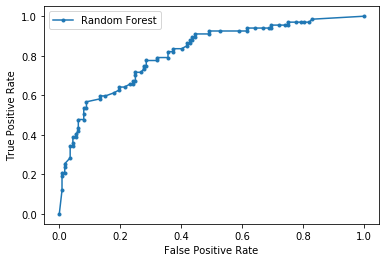

In [64]:
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()